<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/05_EnsembleTech/Assignment/EnsembleTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imporing the required lib

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV 

## Imports for Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

## Metrics
from sklearn.metrics import roc_curve,recall_score,precision_score,f1_score,auc,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing data and review

In [2]:
data = pd.read_csv("/Data - Parkinsons")

In [3]:
# Format the columns names
data.columns = data.columns.str.replace("[:,(]","_")
data.columns = data.columns.str.replace("[)]","")
data.head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.shape

(195, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   MDVP_Fo_Hz       195 non-null    float64
 2   MDVP_Fhi_Hz      195 non-null    float64
 3   MDVP_Flo_Hz      195 non-null    float64
 4   MDVP_Jitter_%    195 non-null    float64
 5   MDVP_Jitter_Abs  195 non-null    float64
 6   MDVP_RAP         195 non-null    float64
 7   MDVP_PPQ         195 non-null    float64
 8   Jitter_DDP       195 non-null    float64
 9   MDVP_Shimmer     195 non-null    float64
 10  MDVP_Shimmer_dB  195 non-null    float64
 11  Shimmer_APQ3     195 non-null    float64
 12  Shimmer_APQ5     195 non-null    float64
 13  MDVP_APQ         195 non-null    float64
 14  Shimmer_DDA      195 non-null    float64
 15  NHR              195 non-null    float64
 16  HNR              195 non-null    float64
 17  status          

In [6]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

Observation:
- there 195 observation with 24 features ( 1 dependent variable "status" ) 
- All the independent variables ( excluding "name" ) are continuous variable ( float ) 
- Dependent variable "Status" binary categorical value


#### Exploratory data analysis

##### Check for  missing values 

In [7]:
data.isnull().sum()

name               0
MDVP_Fo_Hz         0
MDVP_Fhi_Hz        0
MDVP_Flo_Hz        0
MDVP_Jitter_%      0
MDVP_Jitter_Abs    0
MDVP_RAP           0
MDVP_PPQ           0
Jitter_DDP         0
MDVP_Shimmer       0
MDVP_Shimmer_dB    0
Shimmer_APQ3       0
Shimmer_APQ5       0
MDVP_APQ           0
Shimmer_DDA        0
NHR                0
HNR                0
status             0
RPDE               0
DFA                0
spread1            0
spread2            0
D2                 0
PPE                0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP_Fo_Hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP_Fhi_Hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP_Flo_Hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP_Jitter_%,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP_Jitter_Abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP_RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP_PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter_DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP_Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP_Shimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Observation :
- none of the independent variable has missing value ( either null or zero)

##### plot data distribution

In [9]:
def plot_distribution(data,column_name,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.distplot(data[column_name],ax=ax[0],bins=10)
    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[1],palette=["g","r"])
    #sm.qqplot(data[column_name],ax=ax[2],line='45',fit=True)
    #ax[2].set_xlabel(column_name)
    sns.boxplot(data=data,y=column_name,x="status",orient='v',ax=ax[2],palette=["g","r"])
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 

In [10]:
# removing the Target column ("status") and "Name"
dp_columns = list(data.columns)
dp_columns.remove("status")
dp_columns.remove("name")

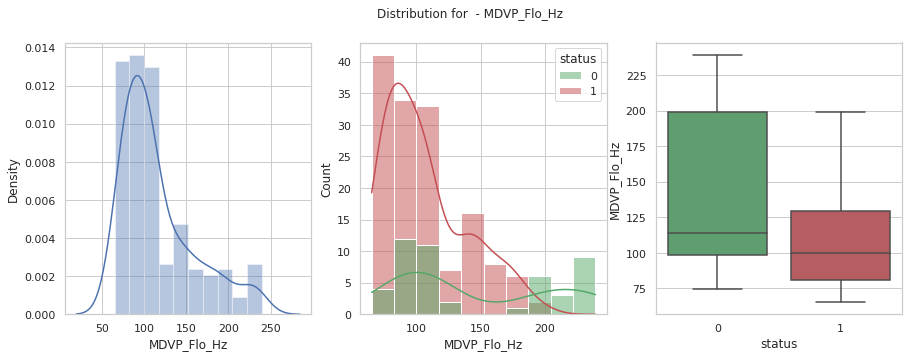

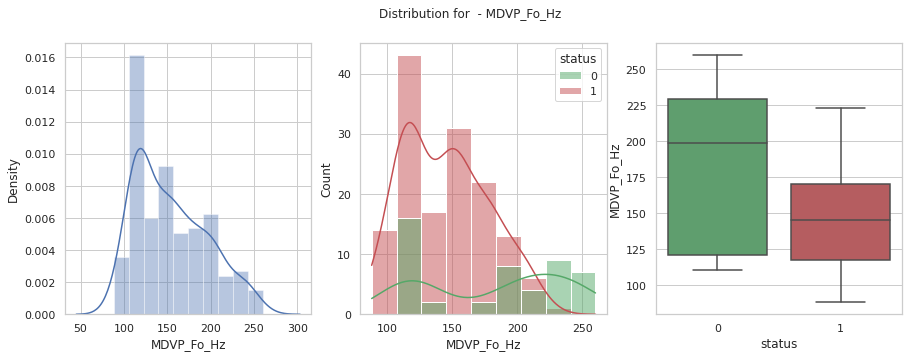

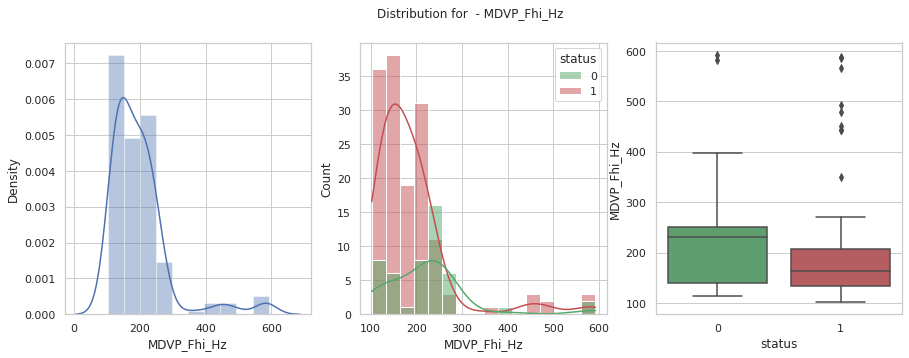

In [11]:
# plot the distribution vocal fundamental frequency
for column_name in ['MDVP_Flo_Hz','MDVP_Fo_Hz','MDVP_Fhi_Hz']:
     plot_distribution(data,column_name,"status")
#plot_distribution(data,column_name,"status")


Observation for vocal fundamental frequency
- Min vocal fundamental frequency  - positive skew / most of the observations are between 80 - 130 Hz
- Average vocal fundamental freq - positive skew / most of the observation are between 110 - 135 Hz
- Max vocal fundamental freq - no skew / there are some outliers at the right side of the distribution.
- Median value of vocal fundamental frequency ( max,Avg,min) for people with PD is lower than healthy person 

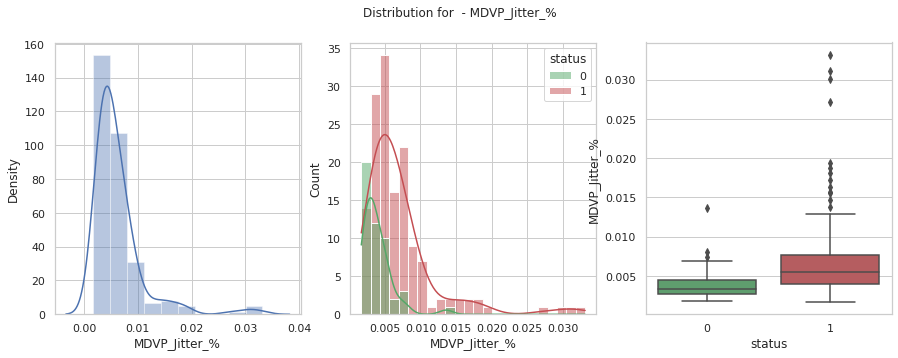

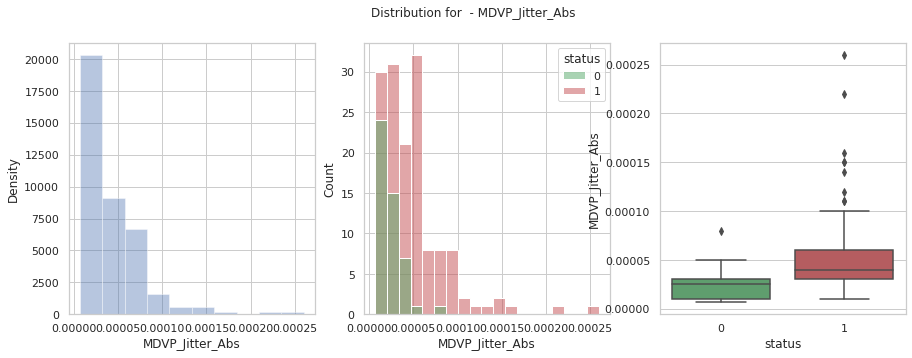

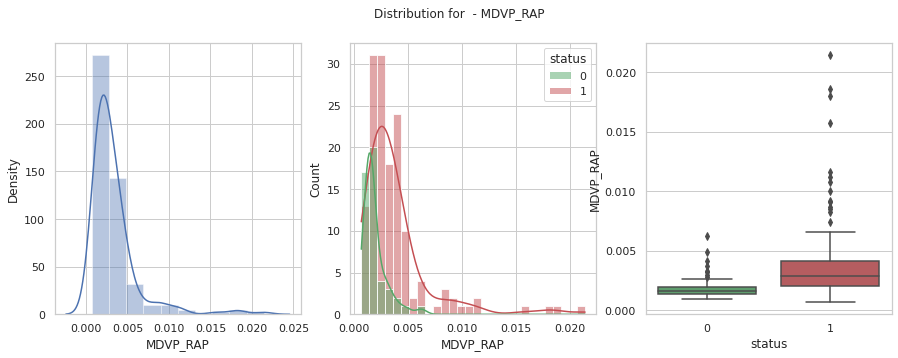

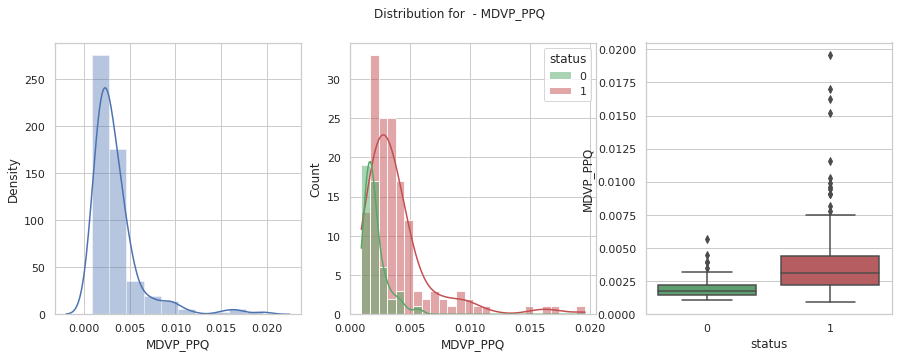

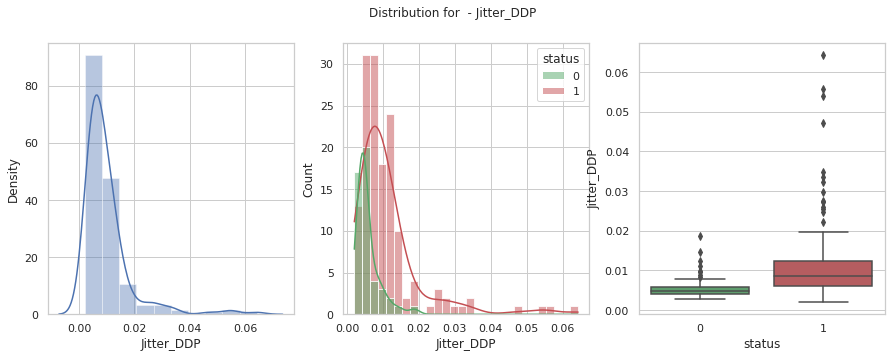

In [12]:
# plot the distribution variation in fundamental frequency
for column_name in ['MDVP_Jitter_%','MDVP_Jitter_Abs','MDVP_RAP','MDVP_PPQ','Jitter_DDP']:
     plot_distribution(data,column_name,"status")
#plot_distribution(data,column_name,"status")


Observation for variation in fundamental frequency
- has almost normal distribution with outliers at right side.
- people with PD has higher variation in fundamental frequency than healthy person


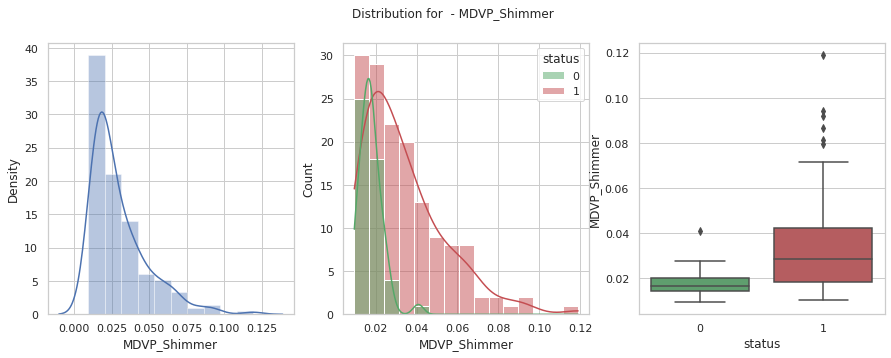

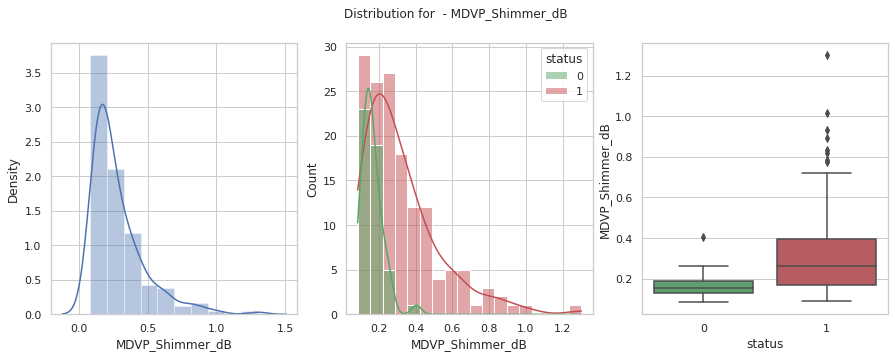

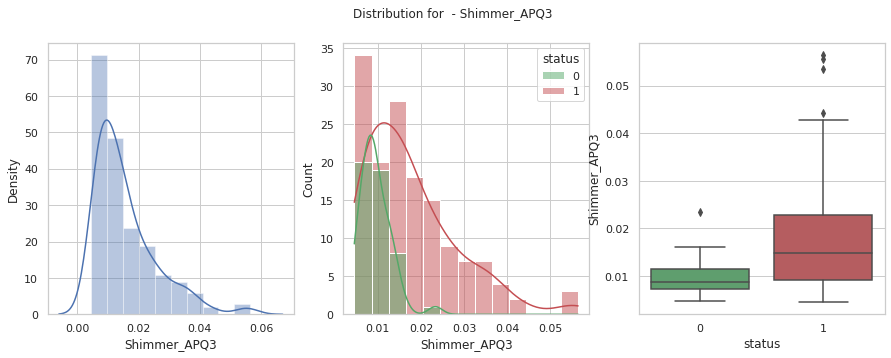

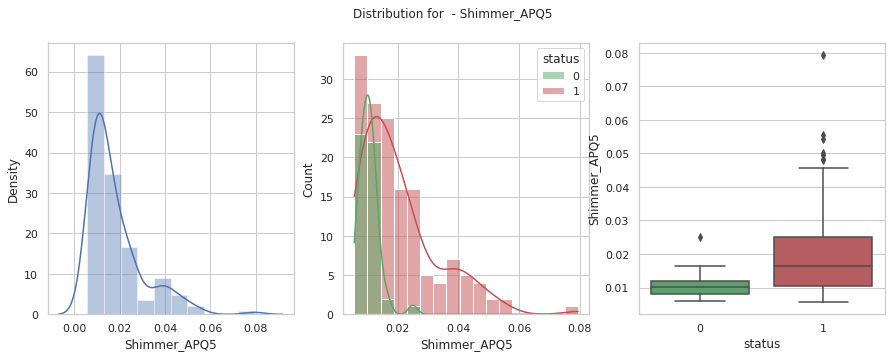

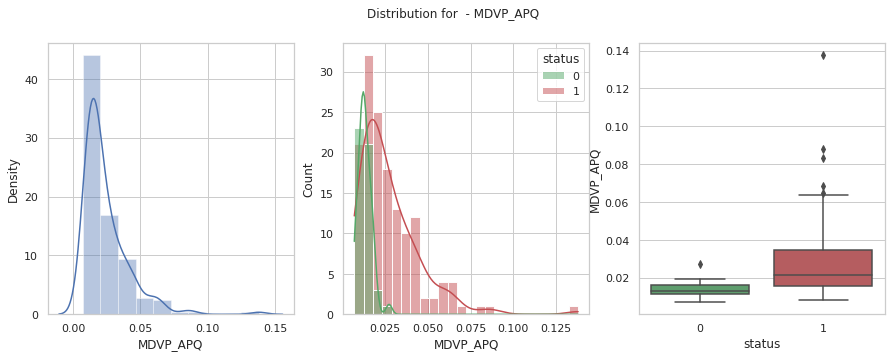

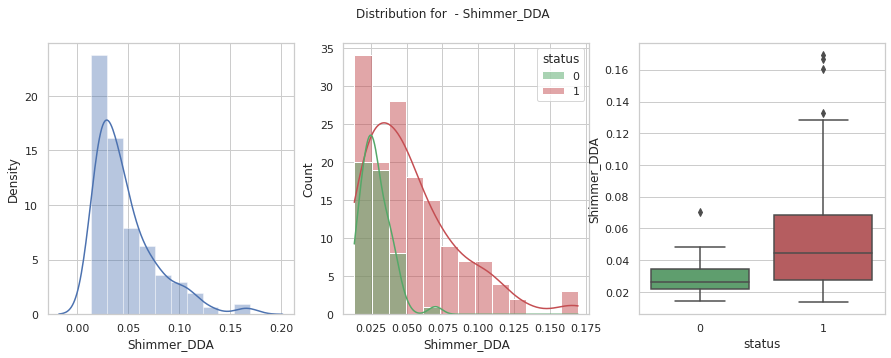

In [13]:
# plot the distribution variation in amplitude
for column_name in ['MDVP_Shimmer','MDVP_Shimmer_dB','Shimmer_APQ3','Shimmer_APQ5','MDVP_APQ','Shimmer_DDA']:
     plot_distribution(data,column_name,"status")
#plot_distribution(data,column_name,"status")

Observation for variation in amplitude
- positively skewed and variation in amplitude is higher for people with PD than healthy person

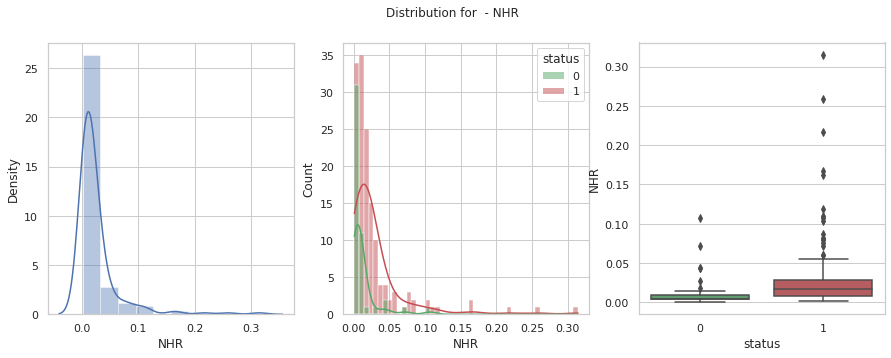

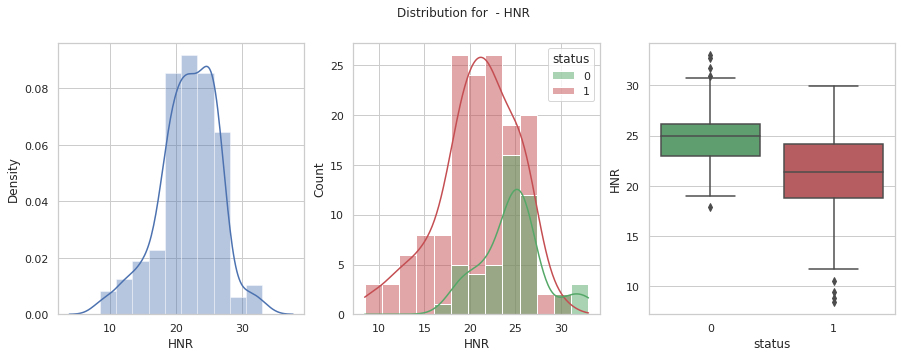

In [14]:
# plot the distribution in voice quality
for column_name in ['NHR','HNR']:
     plot_distribution(data,column_name,"status")
#plot_distribution(data,column_name,"status")

Observation for voice quality ( NHR (noise/harmonic ratio) and HNR (harmonic/noise ratio) ) 
- NHR (noise/harmonic ratio) - positively skewed and health people has low NHR ratio
- HNR (harmonic/noise ratio) - little negative skewed and health people has higher HNR ratio  

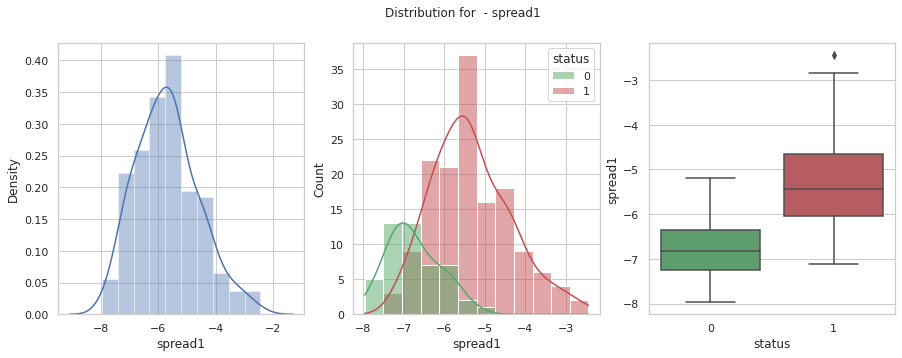

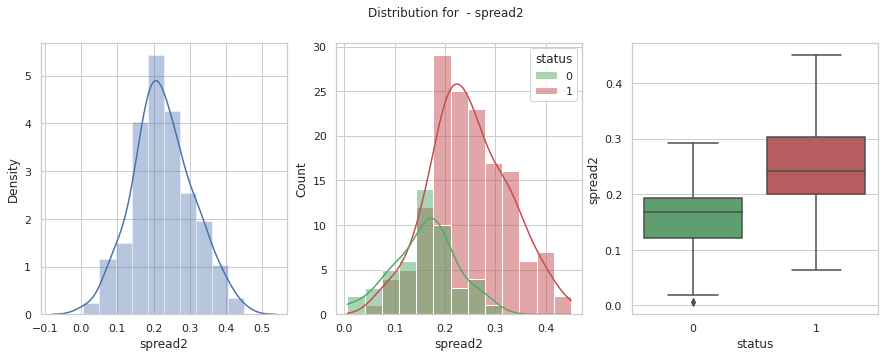

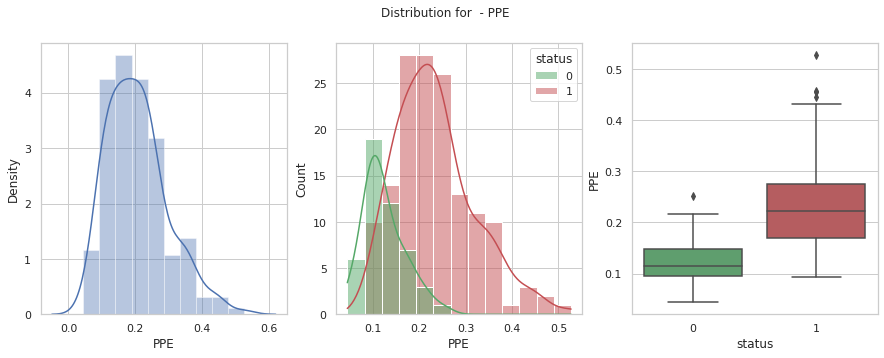

In [15]:
# plot the distribution  for variation in fundamental frequency 
for column_name in ['spread1','spread2','PPE']:
     plot_distribution(data,column_name,"status")
#plot_distribution(data,column_name,"status")

Observation for measures variation in fundamental frequency
- Speed1 and speed2 follow the normal distribution 
- Variation are less for people who are health and than people with PD

##### Correlation bwt features

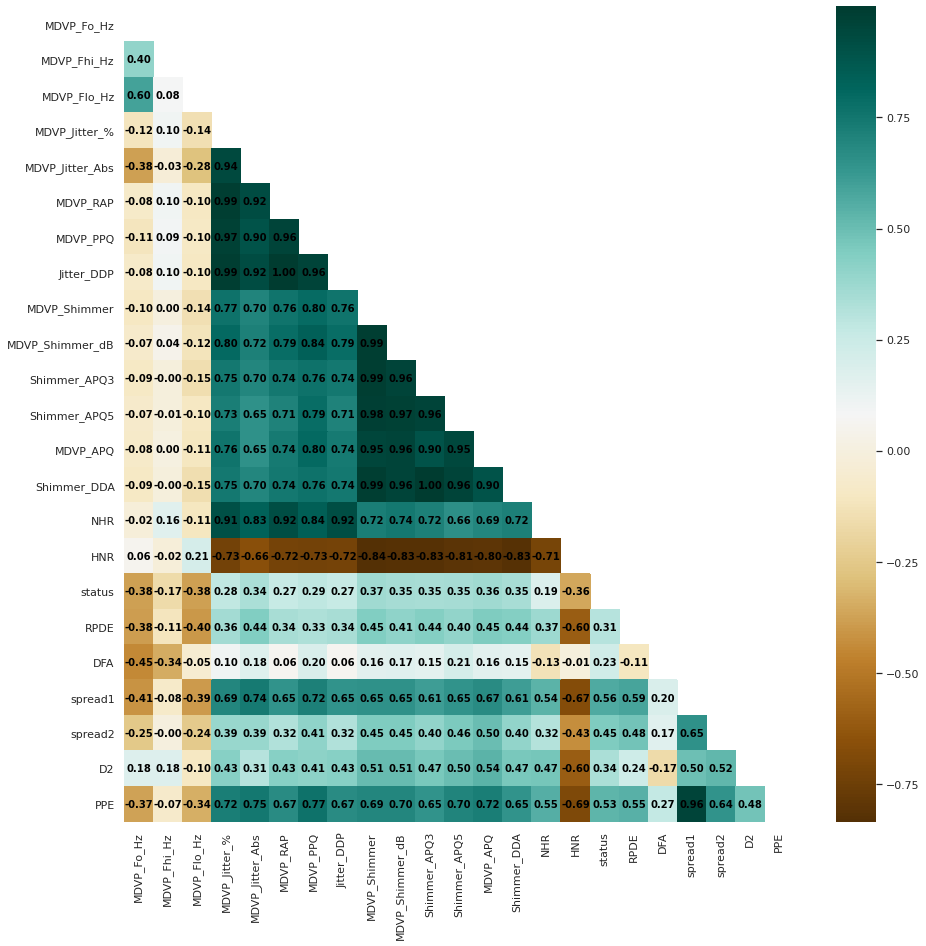

In [16]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(15,15))

ax = sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap="BrBG",mask=mask,annot_kws={"weight": "bold","color": "black"})
plt.show()

Observation :

    - high correlation between - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
    - high correlation between - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
    - NHR and HNR - correlation with attributes of Jitter and Shimmer
    - HNR - correlation with most of the features except the vocal fundamental frequency 
    


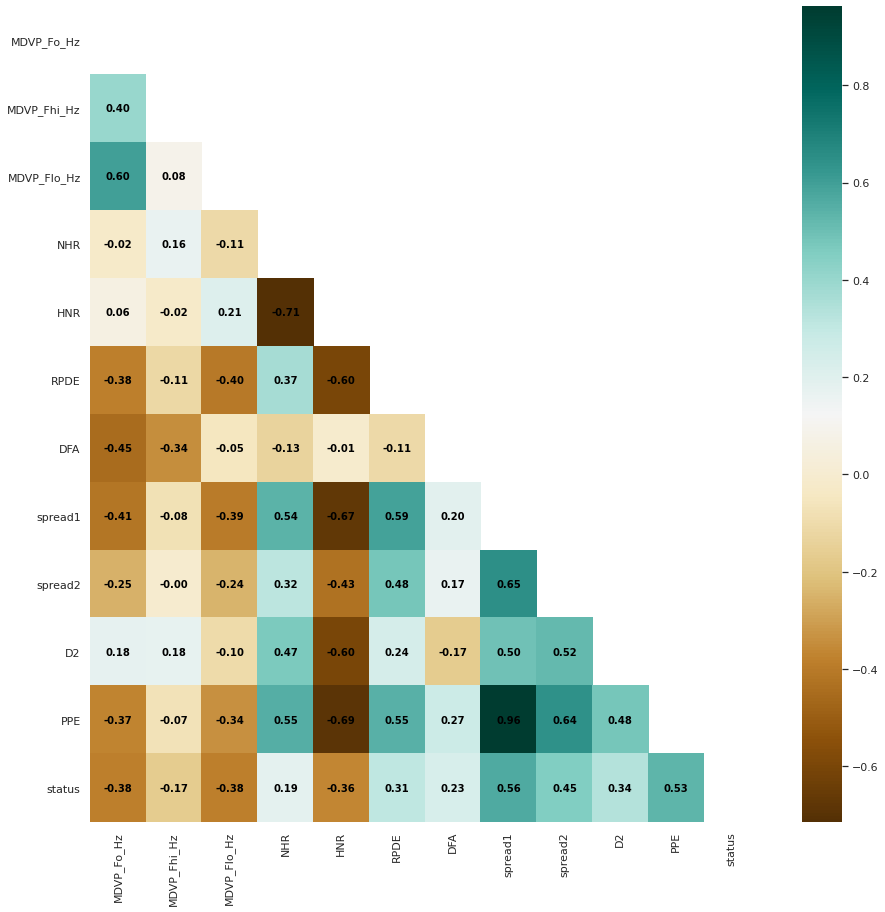

In [17]:
# correlation Matrix by removing high correlated features 
corr_matrix = data[['MDVP_Fo_Hz','MDVP_Fhi_Hz','MDVP_Flo_Hz','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']].corr()
mask = np.zeros_like(corr_matrix,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(15,15))

ax = sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap="BrBG",mask=mask,annot_kws={"weight": "bold","color": "black"})
plt.show()

#### Model Building

In [18]:
id_variable = ['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_%',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']
id_variable_ver2 = ['MDVP_Fo_Hz','MDVP_Fhi_Hz','MDVP_Flo_Hz','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
dependent_variable = ['status']


def check_distribution(traindata,testdata,columns_list):
    for column_name in columns_list:
        print("---------------",column_name,"------------")
        print(round(traindata[column_name].value_counts() / traindata[column_name].count(),2)*100)
        print(round(testdata[column_name].value_counts() / testdata[column_name].count(),2)*100)
        

metrics_data_df = pd.DataFrame(columns=["type","iter_no","hyperparam","train_score","test_score","TPR","PPR","f1_score","FPR","roc_auc","confusion_matrix_obj"])
        


##### Logistic Regression - Iteration 1

In [19]:
#Train data test data Split

X = data[id_variable]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Train and test model
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

#Metrics calculation
fpr,tpr,threshold = roc_curve(y_test,y_predict)
roc_auc  = auc(fpr, tpr)

metrics_disc = dict()
metrics_disc = {"type":"lg",
                         "iter_no":1,
                         "train_score":round(model.score(X_train,y_train),2),
                         "test_score":round(model.score(X_test,y_test),2),
                         "TPR":round(recall_score(y_test,y_predict),2),
                         "PPR":round(precision_score(y_test,y_predict),2),
                         "f1_score":round(f1_score(y_test,y_predict),2),
                         "FPR":round(fpr[1],2),
                         "roc_auc":round(roc_auc,2),
                         "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}

metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)

metrics_data_df


x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"


##### Logistic Regression - Iteration 2

In [20]:
#Train data test data Split

X = data[id_variable_ver2]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Train and test model
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

#Metrics calculation
fpr,tpr,threshold = roc_curve(y_test,y_predict)
roc_auc  = auc(fpr, tpr)

metrics_disc = dict()
metrics_disc = {"type":"lg",
                         "iter_no":2,
                         "train_score":round(model.score(X_train,y_train),2),
                         "test_score":round(model.score(X_test,y_test),2),
                         "TPR":round(recall_score(y_test,y_predict),2),
                         "PPR":round(precision_score(y_test,y_predict),2),
                         "f1_score":round(f1_score(y_test,y_predict),2),
                         "FPR":round(fpr[1],2),
                         "roc_auc":round(roc_auc,2),
                         "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}

metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)

metrics_data_df

x train data (136, 11)
y train data (136, 1)
x test data  (59, 11)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"


##### KNN

In [21]:
#Train data test data Split

X = data[id_variable]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Scaling the attributes 
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

neighbors = list(filter(lambda x: x % 2 != 0,  list(range(1,20))))

iteration = 0
for k in neighbors:
    iteration = iteration+1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    fpr,tpr,threshold = roc_curve(y_test,y_predict)
    roc_auc  = auc(fpr, tpr)
    metrics_disc = dict()
    metrics_disc = {"type":"KNN",
                         "iter_no":iteration,
                         "hyperparam":{"neighbors":k},
                         "train_score":round(model.score(X_train,y_train),2),
                         "test_score":round(model.score(X_test,y_test),2),
                         "TPR":round(recall_score(y_test,y_predict),2),
                         "PPR":round(precision_score(y_test,y_predict),2),
                         "f1_score":round(f1_score(y_test,y_predict),2),
                         "FPR":round(fpr[1],2),
                         "roc_auc":round(roc_auc,2),
                         "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}
    metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)
    
    metrics_data_df



x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


In [22]:
metrics_data_df

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
5,KNN,4,{'neighbors': 7},0.93,0.88,0.95,0.89,0.92,0.31,0.82,"[[11, 5], [2, 41]]"
6,KNN,5,{'neighbors': 9},0.88,0.90,0.98,0.89,0.93,0.31,0.83,"[[11, 5], [1, 42]]"
7,KNN,6,{'neighbors': 11},0.90,0.85,0.98,0.84,0.90,0.50,0.74,"[[8, 8], [1, 42]]"
8,KNN,7,{'neighbors': 13},0.85,0.86,0.98,0.86,0.91,0.44,0.77,"[[9, 7], [1, 42]]"
9,KNN,8,{'neighbors': 15},0.83,0.81,0.98,0.81,0.88,0.62,0.68,"[[6, 10], [1, 42]]"


##### Support Vector Classifier

In [23]:


#parameters = {'kernel':('linear', 'rbf'), 'C':[1,10,100,1000], 'gamma':[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}


X = data[id_variable]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Scaling the attributes 
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

iteration = 0
for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
            iteration = iteration + 1
            model = SVC(C=C,gamma =gamma,random_state=101)
            model.fit(X_train, y_train)
            y_predict = model.predict(X_test)
            fpr,tpr,threshold = roc_curve(y_test,y_predict)
            roc_auc  = auc(fpr, tpr)
            metrics_disc = dict()
            metrics_disc = {"type":"SVC",
                     "iter_no":iteration,
                     "hyperparam":{"C":C,"Gamma":gamma},
                     "train_score":round(model.score(X_train,y_train),2),
                     "test_score":round(model.score(X_test,y_test),2),
                     "TPR":round(recall_score(y_test,y_predict),2),
                     "PPR":round(precision_score(y_test,y_predict),2),
                     "f1_score":round(f1_score(y_test,y_predict),2),
                     "FPR":round(fpr[1],2),
                     "roc_auc":round(roc_auc,2),
                     "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}
            metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)

x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


In [24]:
metrics_data_df

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
5,KNN,4,{'neighbors': 7},0.93,0.88,0.95,0.89,0.92,0.31,0.82,"[[11, 5], [2, 41]]"
6,KNN,5,{'neighbors': 9},0.88,0.90,0.98,0.89,0.93,0.31,0.83,"[[11, 5], [1, 42]]"
7,KNN,6,{'neighbors': 11},0.90,0.85,0.98,0.84,0.90,0.50,0.74,"[[8, 8], [1, 42]]"
8,KNN,7,{'neighbors': 13},0.85,0.86,0.98,0.86,0.91,0.44,0.77,"[[9, 7], [1, 42]]"
9,KNN,8,{'neighbors': 15},0.83,0.81,0.98,0.81,0.88,0.62,0.68,"[[6, 10], [1, 42]]"


##### Bagging - Random Forest

In [25]:
X = data[id_variable]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Scaling the attributes 
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


In [26]:
## GridSearchCV - helps in hyperparameter tuning to find the best hyperparametes, it validate the model by creating 
## multiple combination values for hyperparameter


parameters = {'max_features':[2,3,4,5,6], 
              'n_estimators':[100],
              'max_depth':[3,6,9],
               'min_samples_split':[5, 10, 15, 100],
                'min_samples_leaf':[ 5, 10] 
              
             }
rfc = RandomForestClassifier(random_state=101)
model = GridSearchCV(rfc, parameters,scoring='f1')
model.fit(X_train, y_train)
print("Best hyperparams--",model.best_params_)
y_predict = model.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predict)
roc_auc  = auc(fpr, tpr)
metrics_disc = dict()
metrics_disc = {"type":"RFC",
          "iter_no":1,
          "hyperparam":model.best_params_,
          "train_score":round(model.score(X_train,y_train),2),
          "test_score":round(model.score(X_test,y_test),2),
          "TPR":round(recall_score(y_test,y_predict),2),
          "PPR":round(precision_score(y_test,y_predict),2),
          "f1_score":round(f1_score(y_test,y_predict),2),
          "FPR":round(fpr[1],2),
          "roc_auc":round(roc_auc,2),
          "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}
metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)


Best hyperparams-- {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [27]:
metrics_data_df

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
5,KNN,4,{'neighbors': 7},0.93,0.88,0.95,0.89,0.92,0.31,0.82,"[[11, 5], [2, 41]]"
6,KNN,5,{'neighbors': 9},0.88,0.90,0.98,0.89,0.93,0.31,0.83,"[[11, 5], [1, 42]]"
7,KNN,6,{'neighbors': 11},0.90,0.85,0.98,0.84,0.90,0.50,0.74,"[[8, 8], [1, 42]]"
8,KNN,7,{'neighbors': 13},0.85,0.86,0.98,0.86,0.91,0.44,0.77,"[[9, 7], [1, 42]]"
9,KNN,8,{'neighbors': 15},0.83,0.81,0.98,0.81,0.88,0.62,0.68,"[[6, 10], [1, 42]]"


##### Meta-Classifier or Stacking

In [28]:
# Selecting the best models from previous execution
#print(metrics_data_df.columns)
metrics_data_df.sort_values(by=['roc_auc','f1_score','test_score'],ascending=False)

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
24,RFC,1,"{'max_depth': 6, 'max_features': 5, 'min_sampl...",0.97,0.97,1.00,0.93,0.97,0.19,0.91,"[[13, 3], [0, 43]]"
16,SVC,5,"{'C': 10, 'Gamma': 0.1}",0.88,0.93,1.00,0.91,0.96,0.25,0.88,"[[12, 4], [0, 43]]"
21,SVC,10,"{'C': 100, 'Gamma': 0.01}",0.88,0.93,1.00,0.91,0.96,0.25,0.88,"[[12, 4], [0, 43]]"
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
20,SVC,9,"{'C': 100, 'Gamma': 0.1}",0.91,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
6,KNN,5,{'neighbors': 9},0.88,0.90,0.98,0.89,0.93,0.31,0.83,"[[11, 5], [1, 42]]"


Stacking Architecture:

*   First layer Classifier

 - KNN - {'neighbors': 3}
 - RFC - {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
 - SVC - {'C': 10, 'Gamma': 0.1}
*   Final Estimator - LogisticRegression(solver='liblinear')





In [29]:
X = data[id_variable]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Check the distribution in train and test for categorial value
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('Distribution of dependent variable')
check_distribution(y_train,y_test,['status'])

# Scaling the attributes 
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x train data (136, 22)
y train data (136, 1)
x test data  (59, 22)
y test data  (59, 1)
Distribution of dependent variable
--------------- status ------------
1    76.0
0    24.0
Name: status, dtype: float64
1    73.0
0    27.0
Name: status, dtype: float64


In [43]:
# Stacking layers and model init
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=100,max_depth=6,max_features=5,min_samples_leaf=5,min_samples_split=5,random_state=101)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=3)),      
                        ('SVC_1',SVC(C=10,gamma =0.1,random_state=101)),
                        ('lg_1',LogisticRegression(solver='liblinear'))       
                       ]
model = StackingClassifier(estimators=layer_one_estimators,final_estimator=LogisticRegression())
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predict)
roc_auc  = auc(fpr, tpr)
metrics_disc = dict()
metrics_disc = {"type":"Stacking",
          "iter_no":1,
          #"hyperparam":layer_one_estimators,
          "train_score":round(model.score(X_train,y_train),2),
          "test_score":round(model.score(X_test,y_test),2),
          "TPR":round(recall_score(y_test,y_predict),2),
          "PPR":round(precision_score(y_test,y_predict),2),
          "f1_score":round(f1_score(y_test,y_predict),2),
          "FPR":round(fpr[1],2),
          "roc_auc":round(roc_auc,2),
          "confusion_matrix_obj":confusion_matrix(y_test,y_predict)}

print(metrics_disc)         
metrics_data_df = metrics_data_df.append(metrics_disc,ignore_index=True)
                       

{'type': 'Stacking', 'iter_no': 1, 'train_score': 0.97, 'test_score': 0.97, 'TPR': 0.98, 'PPR': 0.98, 'f1_score': 0.98, 'FPR': 0.06, 'roc_auc': 0.96, 'confusion_matrix_obj': array([[15,  1],
       [ 1, 42]])}


In [31]:
metrics_data_df

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
5,KNN,4,{'neighbors': 7},0.93,0.88,0.95,0.89,0.92,0.31,0.82,"[[11, 5], [2, 41]]"
6,KNN,5,{'neighbors': 9},0.88,0.90,0.98,0.89,0.93,0.31,0.83,"[[11, 5], [1, 42]]"
7,KNN,6,{'neighbors': 11},0.90,0.85,0.98,0.84,0.90,0.50,0.74,"[[8, 8], [1, 42]]"
8,KNN,7,{'neighbors': 13},0.85,0.86,0.98,0.86,0.91,0.44,0.77,"[[9, 7], [1, 42]]"
9,KNN,8,{'neighbors': 15},0.83,0.81,0.98,0.81,0.88,0.62,0.68,"[[6, 10], [1, 42]]"


#### Selecting the Best Model

In [32]:
metrics_data_df.sort_values(by=['roc_auc','f1_score','test_score'],ascending=False)

,type,iter_no,hyperparam,train_score,test_score,TPR,PPR,f1_score,FPR,roc_auc,confusion_matrix_obj
3,KNN,2,{'neighbors': 3},0.97,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
4,KNN,3,{'neighbors': 5},0.96,0.97,0.95,1.00,0.98,0.00,0.98,"[[16, 0], [2, 41]]"
2,KNN,1,{'neighbors': 1},1.00,0.95,0.93,1.00,0.96,0.00,0.97,"[[16, 0], [3, 40]]"
25,Stacking,1,NaN,0.97,0.97,0.98,0.98,0.98,0.06,0.96,"[[15, 1], [1, 42]]"
24,RFC,1,"{'max_depth': 6, 'max_features': 5, 'min_sampl...",0.97,0.97,1.00,0.93,0.97,0.19,0.91,"[[13, 3], [0, 43]]"
16,SVC,5,"{'C': 10, 'Gamma': 0.1}",0.88,0.93,1.00,0.91,0.96,0.25,0.88,"[[12, 4], [0, 43]]"
21,SVC,10,"{'C': 100, 'Gamma': 0.01}",0.88,0.93,1.00,0.91,0.96,0.25,0.88,"[[12, 4], [0, 43]]"
0,lg,1,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
1,lg,2,NaN,0.85,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"
20,SVC,9,"{'C': 100, 'Gamma': 0.1}",0.91,0.92,0.98,0.91,0.94,0.25,0.86,"[[12, 4], [1, 42]]"


Final Observation:
- Overfit - Some of model has performed good at train data and but not in test data, such a model are ignored 

- KNN {'neighbors': 3} 
  - has a low False Positive, by finding all the healthy person correctly. 
  - If the intension is to find a healthy person this model can be a good choice
- RandomForestClassifier - {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
  - has a low False Negative, by finding all the person affected by PD correctly
  - If the priority is to find the person affected by PD correctly, this model can be the right choice.
- meta-classifier or Stacking:
  - It has a balanced and False positive and False Negative.
  - If the scope is to reduce both the errors, this can be the best choice.


**In medical case ( like predicing the disease ) , prioirty of the model is to have low False Negative by considering that "RandomForestClassifier - {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}" can be a best model for the usecase**